# Experimento 3 - Comparação com ReAct com Prompt Enriquecido

**Objetivo**: Avaliar se a separação explícita da etapa de personalização, proposta no \textit{PersonaReAct}, resulta em respostas mais organizadas, concisas e claras do que a personalização direta por prompt no ReAct tradicional.

**Metodologia**
* Escolher 4 perfis diferentes
* Escolher 1 pergunta para cada perfil
  * Responder cada pergunta com o ReAct com Prompt Enriquecido e com o PersonaReAct
* Submeter o par de respostas (com ReAct com Prompt Enriquecido e com o PersonaReAct) à LLM avaliadora.

Critérios de avaliação da LLM:
* Vocabulário Específico Ao Perfil,
* Foco Informacional Adaptado,
* Organizacao Textual Por Perfil,
* Adaptacao Explícita De Linguagem,
* Coerencia Perfil Resposta,
* Sinais Claros De Personalizacao,

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

# Importação de bibliotecas

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Importação dos Resultados

O arquivo de resultados é composto pelas pontuações (scores) geradas pelo G-Eval para cada um dos 7 critérios elaborados.

A pergunta foi feita utilizando o padrão ReAct e o padrão PersonaReAct para cada perfil listado abaixo.

Cada pontuação foi calculada 20 vezes e os seus resultados salvos nas listas ```scores_personareact``` e ```scores_react_prompt```.

## Influenciador Digital

Pergunta: "Qual jogador mais se destacou em termos de distância percorrida e velocidade média no jogo contra o Ceará no dia 1º de abril de 2023?"


In [2]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_influenciador.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador mais se destacou em termos de dis...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.06,8.43,0.63
1,Qual jogador mais se destacou em termos de dis...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.04,8.54,0.50
2,Qual jogador mais se destacou em termos de dis...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.06,8.51,0.55
3,Qual jogador mais se destacou em termos de dis...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.07,8.71,0.36
4,Qual jogador mais se destacou em termos de dis...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.09,8.62,0.47


In [3]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.51,0.07,8.96,0.04
1,CoerenciaPerfilResposta,9.14,0.03,8.30,0.14
2,FocoInformacionalAdaptado,9.68,0.06,9.44,0.11
3,OrganizacaoTextualPorPerfil,9.40,0.07,8.94,0.02
4,SinaisClarosDePersonalizacao,9.07,0.09,4.30,0.22
5,VocabulárioEspecíficoAoPerfil,9.09,0.03,8.64,0.10


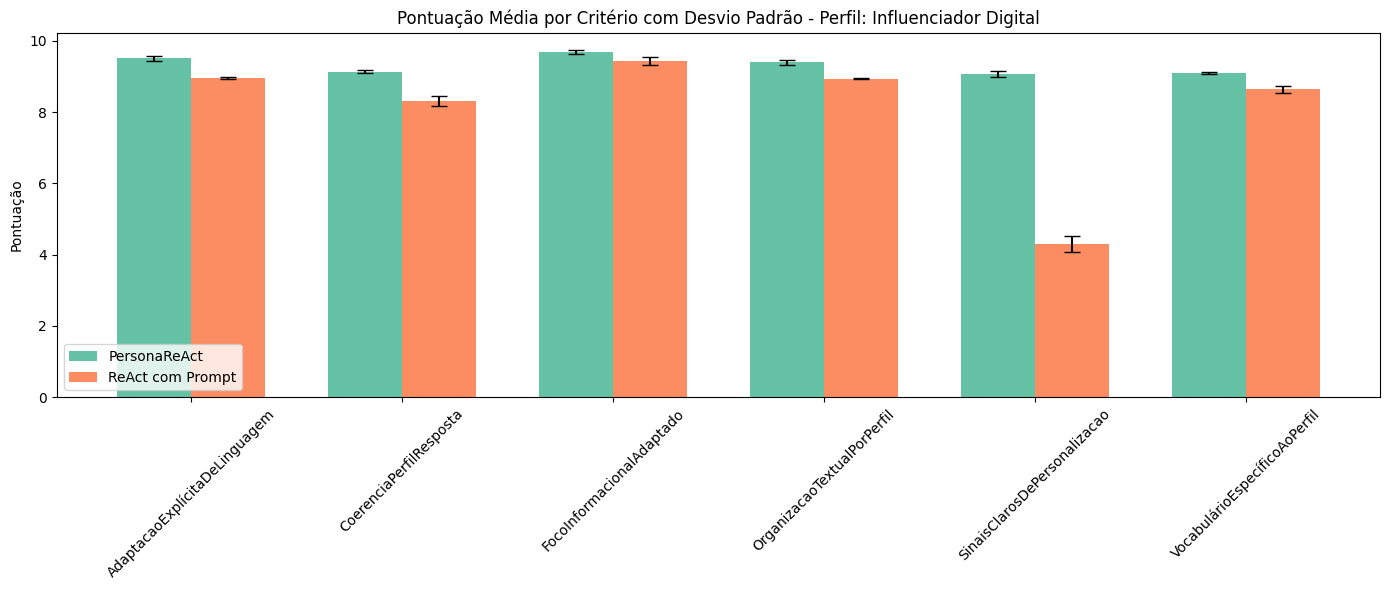

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Influenciador Digital")
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.09,8.64,3.439127e-14,✅
1,FocoInformacionalAdaptado,9.68,9.44,1.122815e-08,✅
2,OrganizacaoTextualPorPerfil,9.40,8.94,4.194729e-16,✅
3,AdaptacaoExplícitaDeLinguagem,9.51,8.96,1.666597e-17,✅
4,CoerenciaPerfilResposta,9.14,8.30,3.559041e-16,✅
5,SinaisClarosDePersonalizacao,9.07,4.30,2.914933e-26,✅


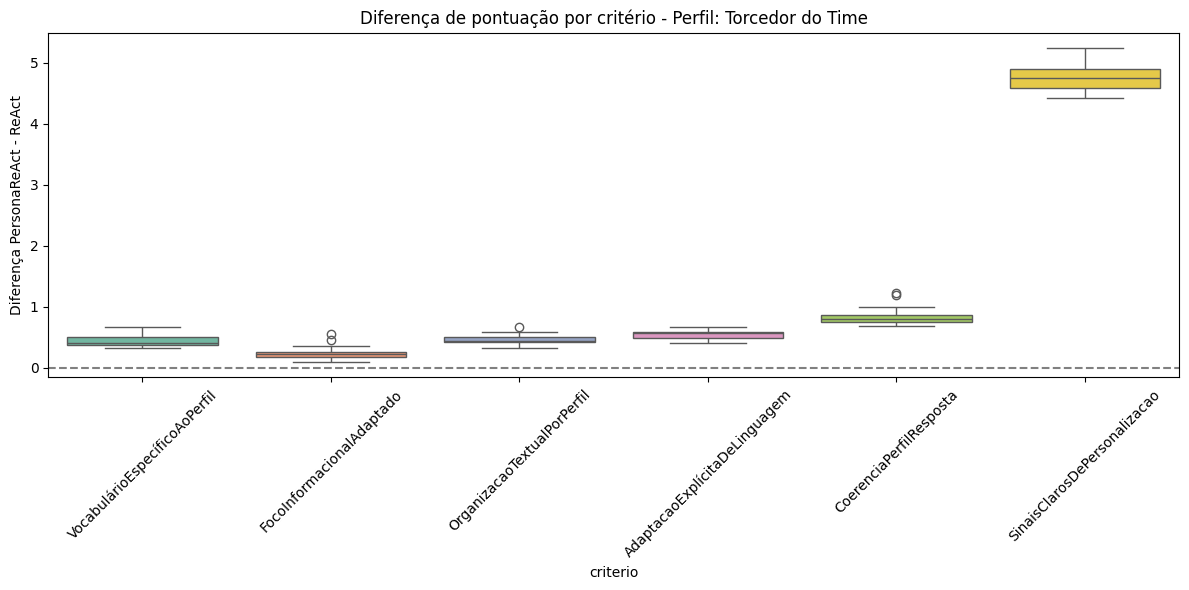

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Torcedor do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

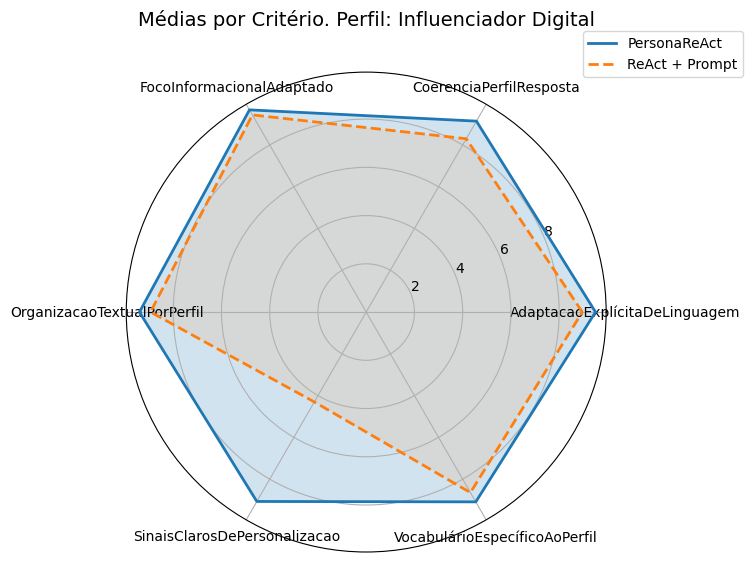

In [14]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Influenciador Digital", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Cômico

Pergunta: "Quais jogadores mais correram durante o primeiro tempo do jogo contra o Ceará no dia 1º de abril de 2023?"

In [15]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_comico.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores mais correram durante o primei...,Cômico,VocabulárioEspecíficoAoPerfil,9.71,9.33,0.38
1,Quais jogadores mais correram durante o primei...,Cômico,VocabulárioEspecíficoAoPerfil,9.75,9.38,0.37
2,Quais jogadores mais correram durante o primei...,Cômico,VocabulárioEspecíficoAoPerfil,9.75,9.21,0.54
3,Quais jogadores mais correram durante o primei...,Cômico,VocabulárioEspecíficoAoPerfil,9.78,9.14,0.64
4,Quais jogadores mais correram durante o primei...,Cômico,VocabulárioEspecíficoAoPerfil,9.75,9.35,0.40


In [16]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.95,0.02,9.70,0.12
1,CoerenciaPerfilResposta,9.54,0.04,9.48,0.03
2,FocoInformacionalAdaptado,9.74,0.07,9.34,0.11
3,OrganizacaoTextualPorPerfil,9.95,0.02,9.80,0.04
4,SinaisClarosDePersonalizacao,9.39,0.04,9.06,0.06
5,VocabulárioEspecíficoAoPerfil,9.74,0.03,9.27,0.07


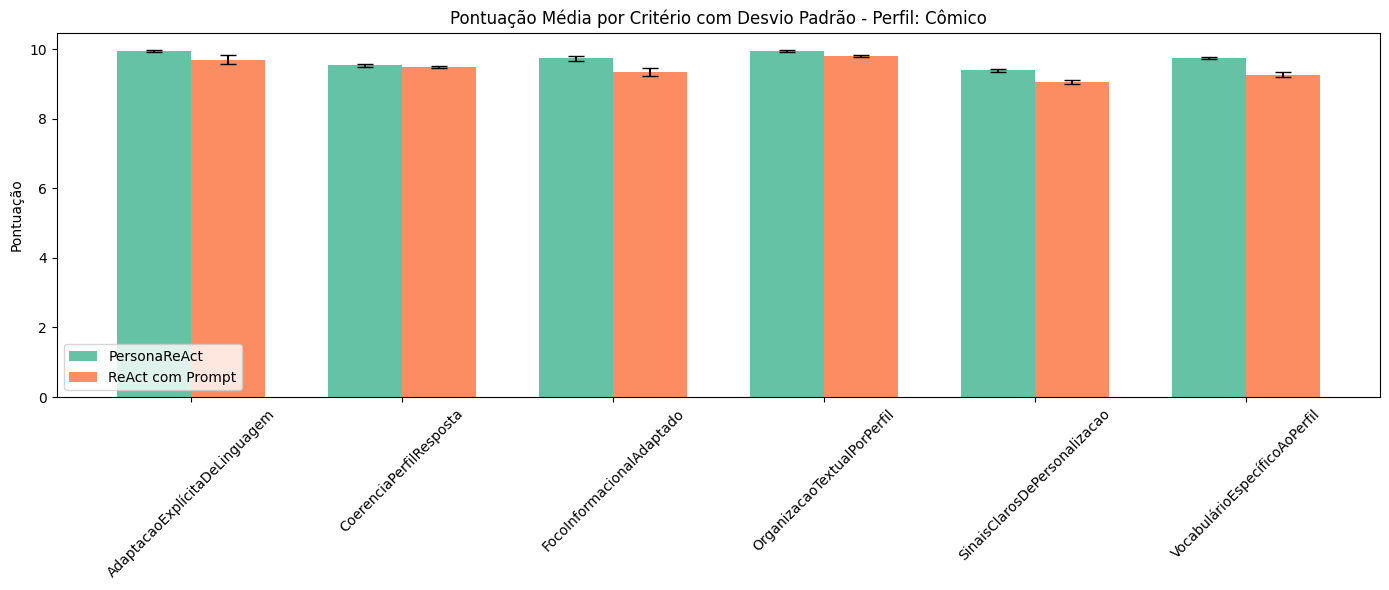

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Cômico")
ax.legend()
plt.tight_layout()
plt.show()

In [19]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.74,9.27,2.275362e-16,✅
1,FocoInformacionalAdaptado,9.74,9.34,1.125120e-11,✅
2,OrganizacaoTextualPorPerfil,9.95,9.80,2.172308e-12,✅
3,AdaptacaoExplícitaDeLinguagem,9.95,9.70,8.656622e-09,✅
4,CoerenciaPerfilResposta,9.54,9.48,1.642566e-04,✅
5,SinaisClarosDePersonalizacao,9.39,9.06,8.881931e-15,✅


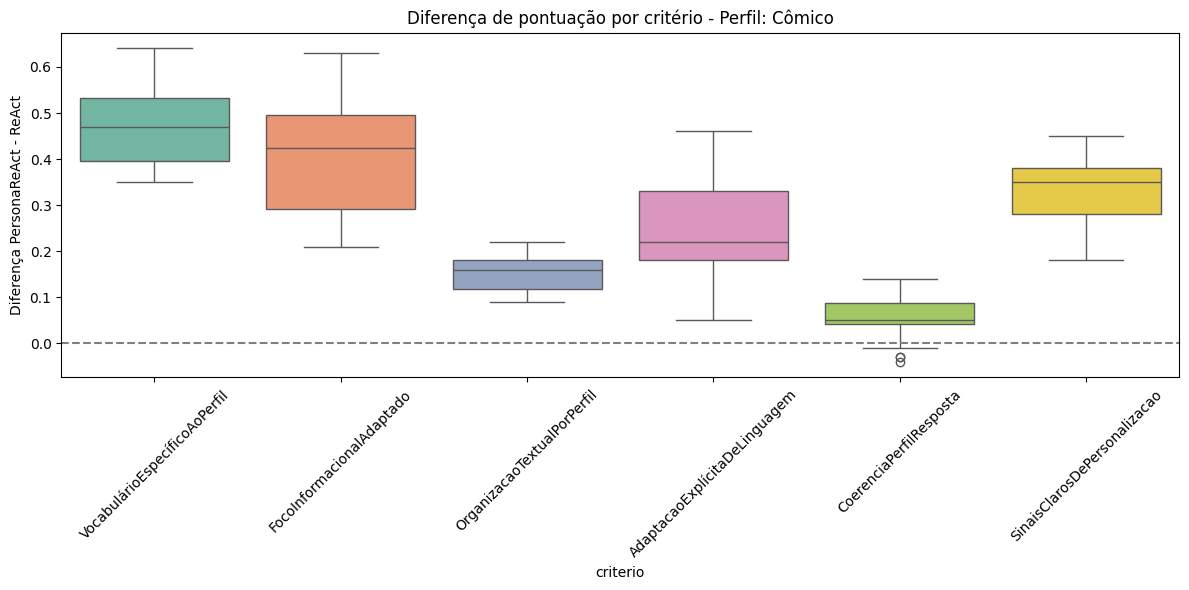

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Cômico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

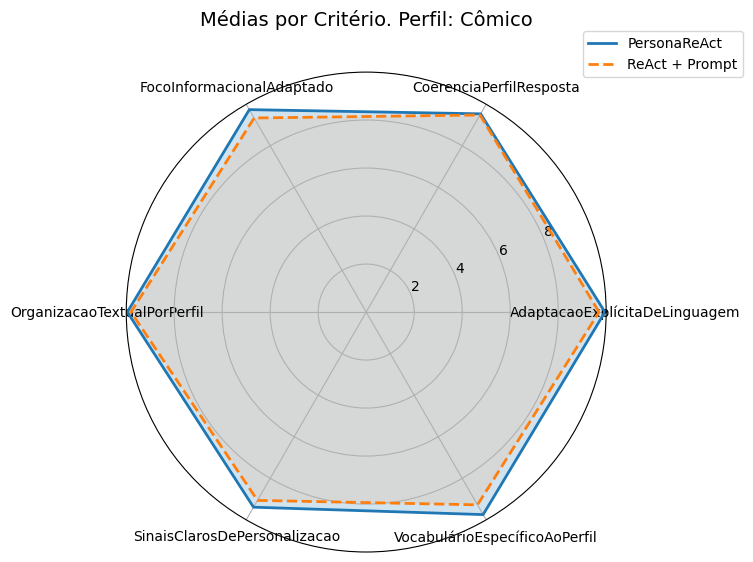

In [21]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Cômico", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Preparador Físico

Pergunta: "Qual jogador teve a maior média de batimentos cardíacos durante a partida contra o Ceará no dia 1º de abril de 2023?"

In [22]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_preparador.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador teve a maior média de batimentos ...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.78,2.30,7.48
1,Qual jogador teve a maior média de batimentos ...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.75,2.34,7.41
2,Qual jogador teve a maior média de batimentos ...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.80,2.33,7.47
3,Qual jogador teve a maior média de batimentos ...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.75,2.29,7.46
4,Qual jogador teve a maior média de batimentos ...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.73,2.31,7.42


In [23]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.66,0.03,4.92,0.57
1,CoerenciaPerfilResposta,9.75,0.19,2.08,0.04
2,FocoInformacionalAdaptado,9.70,0.03,2.94,0.47
3,OrganizacaoTextualPorPerfil,9.28,0.08,3.14,0.71
4,SinaisClarosDePersonalizacao,9.92,0.04,3.66,0.49
5,VocabulárioEspecíficoAoPerfil,9.77,0.03,2.32,0.03


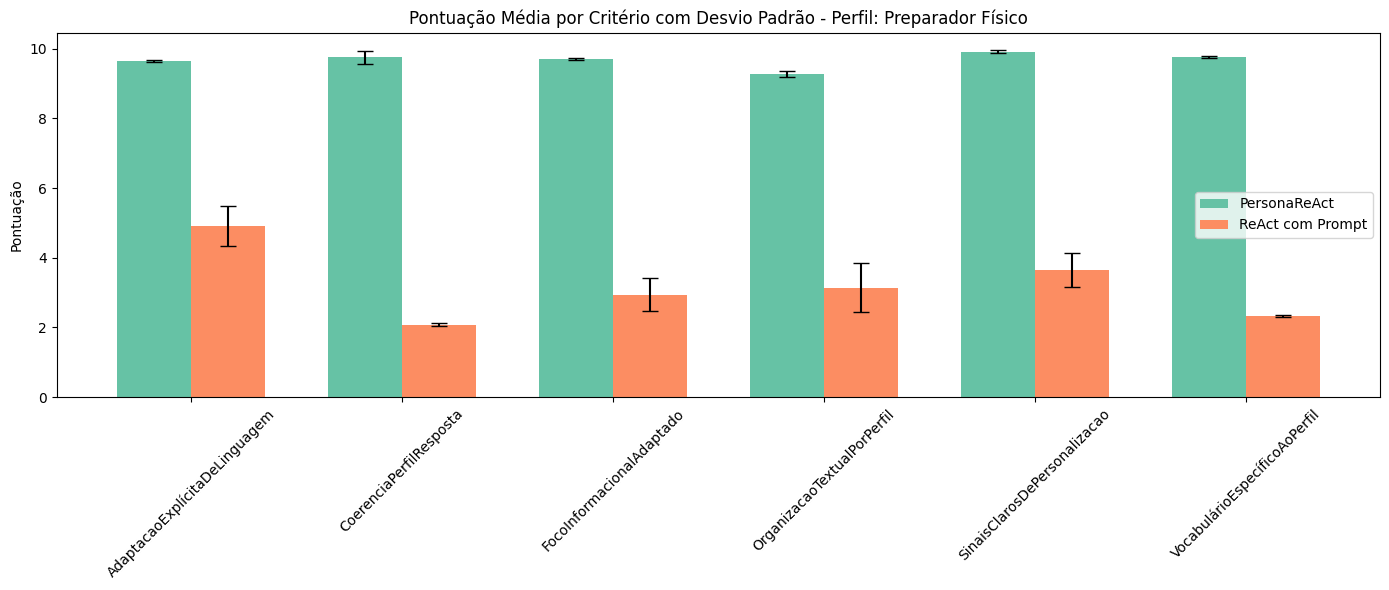

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Preparador Físico")
ax.legend()
plt.tight_layout()
plt.show()

In [27]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.77,2.32,7.686944e-43,✅
1,FocoInformacionalAdaptado,9.70,2.94,1.185525e-23,✅
2,OrganizacaoTextualPorPerfil,9.28,3.14,1.446809e-19,✅
3,AdaptacaoExplícitaDeLinguagem,9.66,4.92,4.195262e-19,✅
4,CoerenciaPerfilResposta,9.75,2.08,8.183810e-32,✅
5,SinaisClarosDePersonalizacao,9.92,3.66,9.757600e-23,✅


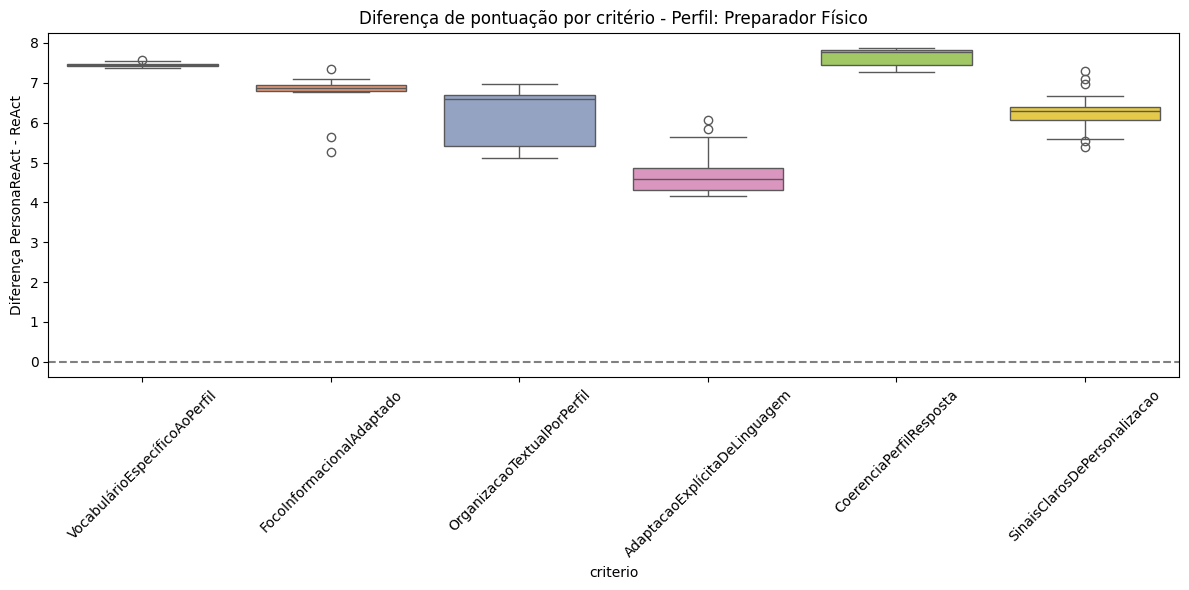

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Preparador Físico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

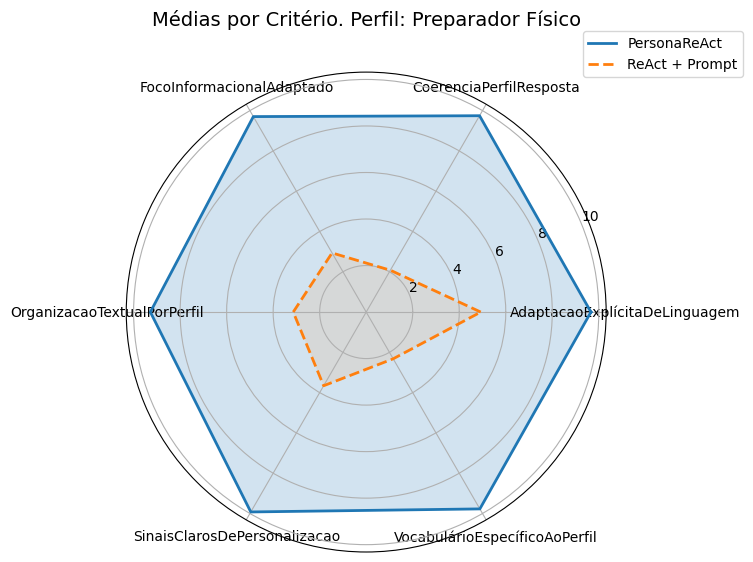

In [29]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Preparador Físico", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Reporter Esportivo

Pergunta: "Quem foi o jogador que ficou mais tempo em alta intensidade na partida e como isso contribuiu para o resultado do jogo contra o Ceará no dia 1º de abril de 2023?"

In [30]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_3_reporter.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quem foi o jogador que ficou mais tempo em alt...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.08,8.91,0.17
1,Quem foi o jogador que ficou mais tempo em alt...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.10,8.86,0.24
2,Quem foi o jogador que ficou mais tempo em alt...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.08,8.86,0.22
3,Quem foi o jogador que ficou mais tempo em alt...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.09,8.87,0.22
4,Quem foi o jogador que ficou mais tempo em alt...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.11,8.89,0.22


In [31]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.47,0.07,8.56,0.06
1,CoerenciaPerfilResposta,9.75,0.07,8.05,0.11
2,FocoInformacionalAdaptado,9.68,0.06,8.59,0.16
3,OrganizacaoTextualPorPerfil,9.10,0.04,8.60,0.12
4,SinaisClarosDePersonalizacao,9.06,0.03,8.54,0.12
5,VocabulárioEspecíficoAoPerfil,9.08,0.04,8.90,0.03


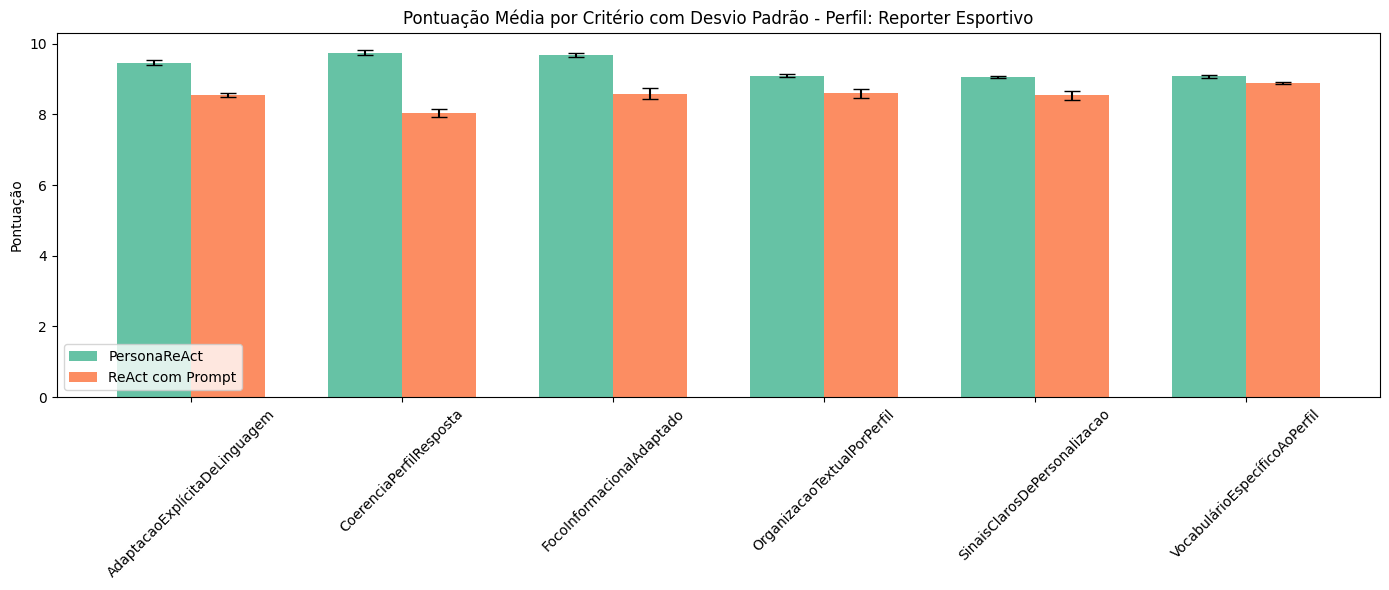

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Reporter Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [34]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.08,8.90,3.164893e-13,✅
1,FocoInformacionalAdaptado,9.68,8.59,1.214019e-17,✅
2,OrganizacaoTextualPorPerfil,9.10,8.60,4.465259e-14,✅
3,AdaptacaoExplícitaDeLinguagem,9.47,8.56,1.737020e-20,✅
4,CoerenciaPerfilResposta,9.75,8.05,1.434759e-22,✅
5,SinaisClarosDePersonalizacao,9.06,8.54,5.671239e-14,✅


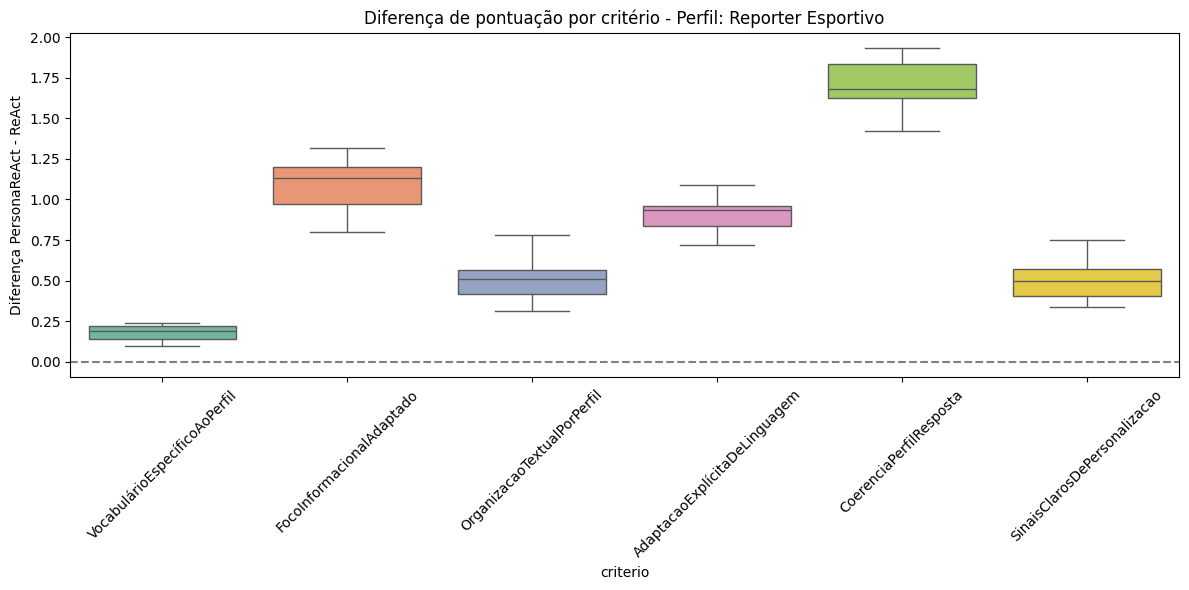

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Reporter Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

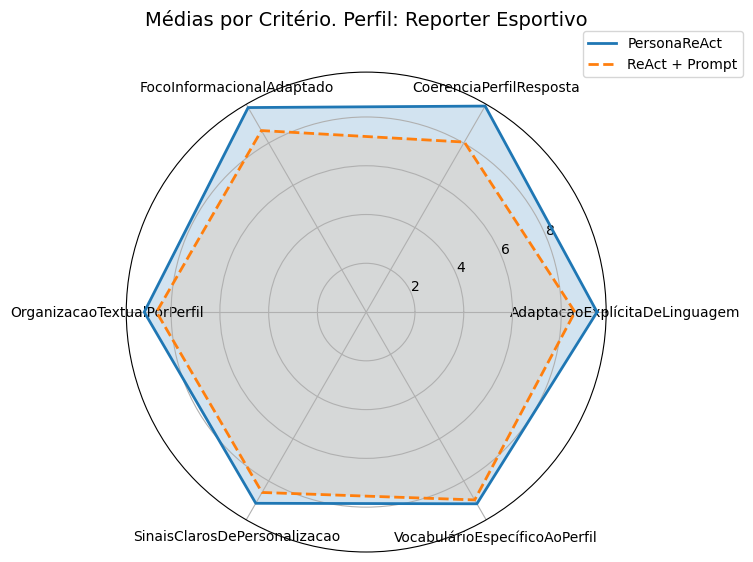

In [37]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Reporter Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()